# 64 Displaying Seismic Horizons and Faults

This notebook illustrates how to display seismic interpretations created in Petrel and exported as Shape Files in Python. The seismic data was acquired in 2021 and was obtained from the Geological Survey of NRW. 

<img src="../images/tutorial65_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import gemgis as gg
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely
from typing import Union
from segysak.segy import segy_loader

In [2]:
file_path ='data/65_displaying_seismic_horizons_and_faults/'
gg.download_gemgis_data.download_tutorial_data(filename="65_displaying_seismic_horizons_and_faults.zip", dirpath=file_path)

## Opening traces of seismic lines

For this tutorial, data of the Landesseismik Münsterland (see https://www.gd.nrw.de/zip/gd_report_2301s.pdf as reference) is used. 

In [3]:
seismic = gpd.read_file(file_path + 'Seismic_Lines_EPSG25832.shp')
seismic

,Profile,length,geometry
0,GD_NRW_2101,25436.00,"LINESTRING (389796.000 5749009.000, 389810.000..."
1,GD_NRW_2102,48120.00,"LINESTRING (379724.000 5765301.500, 379734.000..."


## Plotting the traces

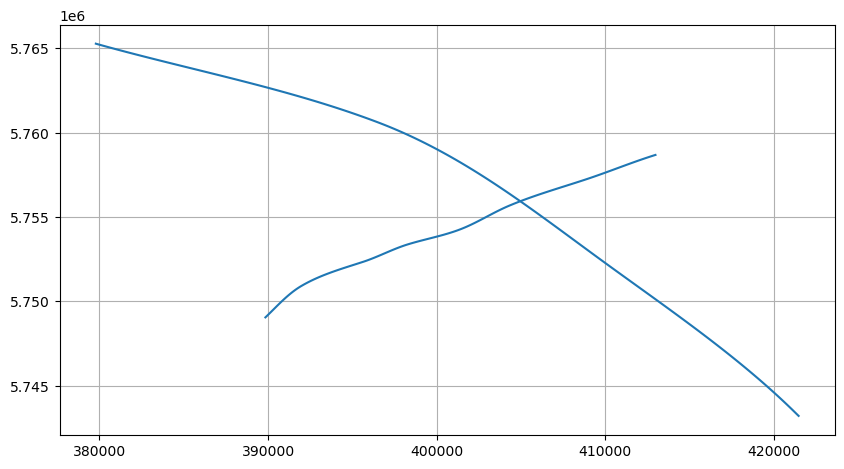

In [4]:
figseismic, ax = plt.subplots(1, figsize=(10,10))

seismic.plot(ax=ax)

plt.grid()

## Loading the seismic data using segysak

The seismic data is loaded using segysak (https://segysak.readthedocs.io/en/latest/). 

In [5]:
landesseismik2102 = segy_loader(file_path + 'Muenster_2D_PreSTM_Stack_2102_AGC.sgy', vert_domain="TWT")
landesseismik2102

  0%|          | 0.00/4.81k [00:00<?, ? traces/s]

Loading as 2D


Converting SEGY:   0%|          | 0.00/4.81k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (cdp: 4806, twt: 1751)
Coordinates:
  * cdp      (cdp) uint16 10203 10204 10205 10206 ... 15005 15006 15007 15008
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 6.992e+03 6.996e+03 7e+03
    cdp_x    (cdp) float32 4.215e+05 4.215e+05 4.215e+05 ... 3.797e+05 3.797e+05
    cdp_y    (cdp) float32 5.743e+06 5.743e+06 5.743e+06 ... 5.765e+06 5.765e+06
Data variables:
    data     (cdp, twt) float32 0.03581 -0.02099 -0.0793 ... -0.01154 0.04135
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 Client       Geologischer Dienst NRW\nC 2 Contra...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Muenster_2D_PreSTM_Stack_2102_AGC.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-3.0195783868438255, -2.780390889497134, -1.2279652...
    coord_scalar:        -100.0

## Converting seismic data to DataFrame

The seismic data can also be converted to a DataFrame to better inspect the data. 

In [6]:
landesseismik2102.to_dataframe()

data     cdp_x      cdp_y
cdp   twt                               
10203 0.00     0.04 421512.00 5743166.00
      4.00    -0.02 421512.00 5743166.00
      8.00    -0.08 421512.00 5743166.00
      12.00   -0.12 421512.00 5743166.00
      16.00   -0.12 421512.00 5743166.00
...             ...       ...        ...
15008 6984.00 -0.11 379724.00 5765301.50
      6988.00 -0.03 379724.00 5765301.50
      6992.00 -0.03 379724.00 5765301.50
      6996.00 -0.01 379724.00 5765301.50
      7000.00  0.04 379724.00 5765301.50

[8415306 rows x 3 columns]

## Getting the seismic colorbar

We can load a color bar for displaying the seismic data. The colorbars were uploaded to the following repository: https://github.com/lperozzi/Seismic_colormaps

matplotlib.colors.ListedColormap

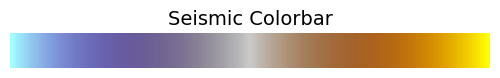

In [7]:
cmap_seismic = gg.visualization.get_seismic_cmap()
type(cmap_seismic)

## Plotting the seismic data 

The seismic data is plotted the built-in plotting function

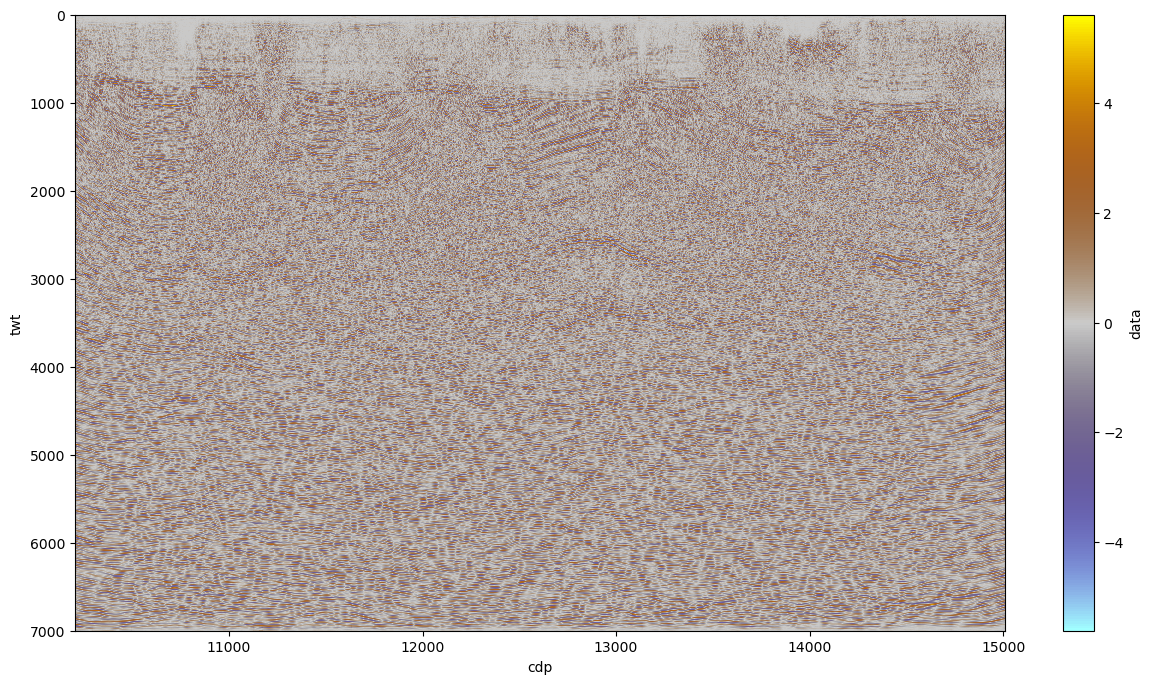

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 8))

landesseismik2102.data.transpose().plot(cmap=cmap_seismic)

plt.gca().invert_yaxis()

## Converting seismic to array

The loaded seismic data is converted into a NumPy array. 

In [10]:
landesseismik2102_array = gg.visualization.seismic_to_array(seismic_data=landesseismik2102, max_depth=4000)
landesseismik2102_array

array([[ 0.03581395, -0.02099377, -0.07930481, ..., -0.3949225 ,
        -0.64953464, -0.88681436],
       [ 0.03755527, -0.02159597, -0.08407128, ..., -0.43278015,
        -0.706827  , -0.9397521 ],
       [ 0.04379281, -0.01925519, -0.09289104, ..., -0.45442533,
        -0.7610789 , -1.0000496 ],
       ...,
       [-0.19376808, -0.18929183, -0.09974575, ..., -1.1590624 ,
        -0.46177298,  0.48989367],
       [-0.16737616, -0.15299934, -0.07530349, ..., -1.0952702 ,
        -0.30956793,  0.64396167],
       [-0.15387064, -0.13157344, -0.06080835, ..., -1.0007935 ,
        -0.14463931,  0.77823424]], dtype=float32)

The same dataset can be obtained using the built-in xarray attributes and methods. 

In [11]:
landesseismik2102.data.transpose()

<xarray.DataArray 'data' (twt: 1751, cdp: 4806)>
array([[ 0.03581395,  0.03755527,  0.04379281, ..., -0.19376808,
        -0.16737616, -0.15387064],
       [-0.02099377, -0.02159597, -0.01925519, ..., -0.18929183,
        -0.15299934, -0.13157344],
       [-0.07930481, -0.08407128, -0.09289104, ..., -0.09974575,
        -0.07530349, -0.06080835],
       ...,
       [ 0.02854965,  0.03610878,  0.03544764, ..., -0.03994363,
        -0.0334743 , -0.02788334],
       [-0.3293916 , -0.32478482, -0.32344526, ..., -0.02570425,
        -0.01836406, -0.01154189],
       [-0.3131938 , -0.3141619 , -0.31639624, ...,  0.03036585,
         0.0359443 ,  0.04135381]], dtype=float32)
Coordinates:
  * cdp      (cdp) uint16 10203 10204 10205 10206 ... 15005 15006 15007 15008
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 6.992e+03 6.996e+03 7e+03
    cdp_x    (cdp) float32 4.215e+05 4.215e+05 4.215e+05 ... 3.797e+05 3.797e+05
    cdp_y    (cdp) float32 5.743e+06 5.743e+06 5.743e+06 ... 5.765e+06 5.765e+06

## Loading Base Cretaceous Horizon - Landesseismik 2102

The Base Cretaceous Horizon that was interpreted in Petrel is loaded as Shape File.

In [12]:
base_cretaceous_2102 = gpd.read_file(file_path + 'U1_2102.shp')
base_cretaceous_2102 = gg.vector.extract_xyz(base_cretaceous_2102)
base_cretaceous_2102['Name'] = '2102'
base_cretaceous_2102['Z'] = base_cretaceous_2102['Z']*(-1)-150
base_cretaceous_2102.head()

,Type,Domain,Droid,Comment,ShapeName,Project,geometry,X,Y,Z,Name
0,Seismic horizon,Unknown,://1d9a2dd1-dd1d-4676-a92e-6057e64d33c2/cb463e...,NaN,Base Cretaceous,C:\Users\Nicklas.Ackermann\Desktop\Muensterlan...,POINT Z (421497.819 5743179.962 -708.911),421497.82,5743179.96,558.91,2102
1,Seismic horizon,Unknown,://1d9a2dd1-dd1d-4676-a92e-6057e64d33c2/cb463e...,NaN,Base Cretaceous,C:\Users\Nicklas.Ackermann\Desktop\Muensterlan...,POINT Z (421490.638 5743186.924 -708.911),421490.64,5743186.92,558.91,2102
2,Seismic horizon,Unknown,://1d9a2dd1-dd1d-4676-a92e-6057e64d33c2/cb463e...,NaN,Base Cretaceous,C:\Users\Nicklas.Ackermann\Desktop\Muensterlan...,POINT Z (421483.457 5743193.886 -710.030),421483.46,5743193.89,560.03,2102
3,Seismic horizon,Unknown,://1d9a2dd1-dd1d-4676-a92e-6057e64d33c2/cb463e...,NaN,Base Cretaceous,C:\Users\Nicklas.Ackermann\Desktop\Muensterlan...,POINT Z (421476.276 5743200.848 -711.149),421476.28,5743200.85,561.15,2102
4,Seismic horizon,Unknown,://1d9a2dd1-dd1d-4676-a92e-6057e64d33c2/cb463e...,NaN,Base Cretaceous,C:\Users\Nicklas.Ackermann\Desktop\Muensterlan...,POINT Z (421469.095 5743207.810 -711.894),421469.10,5743207.81,561.89,2102


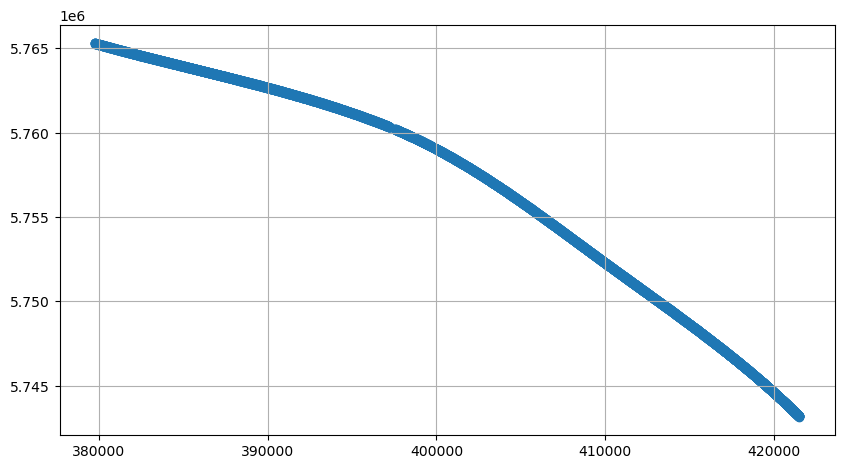

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))

base_cretaceous_2102.plot(ax=ax)
plt.grid()

## Calculating Position on Seismic Line Base Cretaceous

The x, y, z positions are converted to positions along the seismic line.

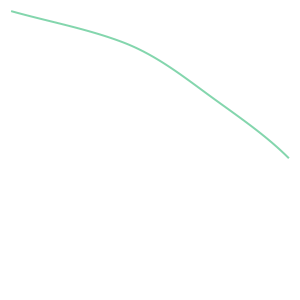

In [14]:
line = seismic.loc[1].geometry 
line

In [15]:
base_cretaceous_2102_features = gpd.read_file(file_path + 'Seismic_Horizons_CDPs_Lines_Base_Cretaceous.shp')
base_cretaceous_2102_features

,Name,geometry
0,2102,"LINESTRING (10204.968 558.911, 10205.975 558.9..."


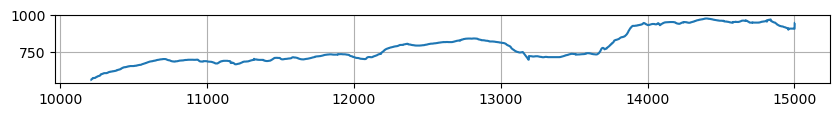

In [16]:
fig, ax = plt.subplots(1, figsize=(10,10))
base_cretaceous_2102_features.plot(ax=ax)
plt.grid()

In [18]:
base_cretaceous_2102_features_linestrings, change_points = gg.visualization.split_seismic_horizons(features_gdf=base_cretaceous_2102_features, 
                                                                                                   threshold=20)
base_cretaceous_2102_features_linestrings, change_points

(                                            geometry  id
 0  LINESTRING (10204.968 558.911, 10205.975 558.9...   0
 1  LINESTRING (13187.289 701.514, 13188.379 698.4...   1
 2  LINESTRING (13191.373 723.164, 13192.368 723.1...   2
 3  LINESTRING (15002.008 950.317, 15003.002 950.094)   3,
 [0, 2947, 2951, 4761, 4763])

In [19]:
base_cretaceous_2102_features_points = gg.vector.extract_xy(base_cretaceous_2102_features)
base_cretaceous_2102_features_points['distance'] = base_cretaceous_2102_features_points.distance(base_cretaceous_2102_features_points.shift(), align=True)

base_cretaceous_2102_features_points

,Name,geometry,X,Y,distance
0,2102,POINT (10204.968 558.911),10204.97,558.91,NaN
1,2102,POINT (10205.975 558.911),10205.97,558.91,1.01
2,2102,POINT (10206.981 560.030),10206.98,560.03,1.50
3,2102,POINT (10207.985 561.149),10207.98,561.15,1.50
4,2102,POINT (10208.985 561.894),10208.99,561.89,1.25
...,...,...,...,...,...
4759,2102,POINT (15000.002 909.671),15000.00,909.67,0.99
4760,2102,POINT (15000.980 909.075),15000.98,909.07,1.15
4761,2102,POINT (15002.008 950.317),15002.01,950.32,41.26
4762,2102,POINT (15003.002 950.094),15003.00,950.09,1.02


In [20]:
threshold = 20

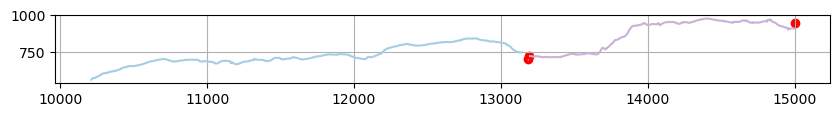

In [21]:
fig, ax = plt.subplots(1, figsize=(10,10))

base_cretaceous_2102_features_linestrings.plot(ax=ax, column='id', cmap='Paired')
base_cretaceous_2102_features_points[base_cretaceous_2102_features_points['distance']>=threshold].plot(ax=ax, color='red')
plt.grid()

In [22]:
base_cretaceous_2102_features_linestrings.to_file(file_path + 'Seismic_Horizons_CDPs_Lines_Base_Cretaceous_split.shp')

In [23]:
faults = gpd.read_file(file_path + 'Faults_CDPs_Lines_split.shp')
faults

,Name,geometry
0,Fault interpretation 164,"LINESTRING (10410.600 309.512, 10417.264 362.367)"
1,Fault interpretation 165,"LINESTRING (10348.015 117.902, 10359.164 262.483)"
2,Fault interpretation 166,"LINESTRING (10825.354 111.007, 10827.121 201.4..."
3,Fault interpretation 167,"LINESTRING (10806.579 103.932, 10812.443 187.4..."
4,Fault interpretation 168,"LINESTRING (10919.610 20.529, 10929.574 120.41..."
...,...,...
140,Fault interpretation 52,"LINESTRING (10378.146 176.226, 10363.864 266.9..."
141,Fault interpretation 53,"LINESTRING (10438.399 532.834, 10438.399 430.5..."
142,Fault interpretation 56,"LINESTRING (10661.375 452.519, 10656.012 384.4..."
143,Fault interpretation 57,"LINESTRING (10783.751 231.979, 10763.524 400.9..."


## Plotting the seismic data and interpretations using matplotlib

In [24]:
minx = landesseismik2102.to_dataframe().reset_index()['cdp'].min()
maxx = landesseismik2102.to_dataframe().reset_index()['cdp'].max()

minx, maxx

(10203, 15008)

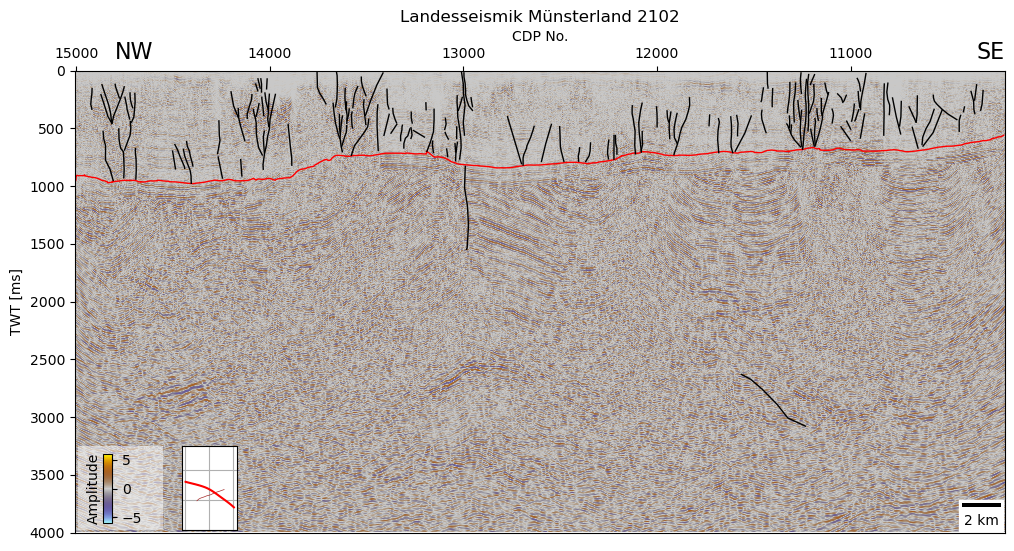

In [25]:
from matplotlib_scalebar.scalebar import ScaleBar
fig, ax = plt.subplots(1, figsize=(12,6))
im = ax.imshow(np.fliplr(landesseismik2102_array.T), 
           cmap=cmap_seismic, 
           vmin=-6, 
           vmax=6, 
           extent=[maxx, 
                   minx, 
                   4000,
                   0])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

axins = ax.inset_axes(bounds=[0.03, 0.02, 0.01, 0.15])

axseismic = ax.inset_axes(bounds=[0.06, 0.006, 0.17, 0.181])
seismic.plot(ax=axseismic, color='brown', linewidth=0.5)
seismic[1:2].plot(ax=axseismic, color='red', linewidth=1.5)

axseismic.set_ylim(5.725e6, 5.795e6)
axseismic.grid(visible=True, which='both',axis='both')
axseismic.set_yticklabels([])
axseismic.set_xticklabels([])
axseismic.xaxis.set_ticks_position('none')
axseismic.yaxis.set_ticks_position('none')

cbar = fig.colorbar(im, cax=axins)
cbar.set_label('Amplitude' ,labelpad=-40)

ax.set_ylabel('TWT [ms]')
ax.set_xlabel('CDP No.')
ax.set_title('Landesseismik Münsterland 2102')

ax.text(10350, -100, 'SE', fontsize=16)
ax.text(14800, -100, 'NW', fontsize=16)


pp1 = plt.Rectangle((14550, 3250), 440, 725, zorder=1, facecolor='white', alpha=0.5)
ax.add_patch(pp1)

scalebar = ScaleBar(0.01, "km", length_fraction=0.1, location='lower right')
ax.add_artist(scalebar)

base_cretaceous_2102_features.plot(ax=ax, color='red', linewidth=1, marker='-')
faults.plot(ax=ax, color='black', linewidth=1, marker='-')
plt.ylim(4000,0)
plt.gca().set_aspect('auto')